# Análisis Socioeconómico de la Región Metropolitana

In [69]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import statsmodels.api as sm
import os

## Lectura de archivos

In [70]:
# codigos de cada comuna
codigos_comunales = pd.read_csv(
    os.path.join("data", "codigos_comunales.csv")
    )

# volvemos a la carpeta principal del proyecto
%cd ..

# data de tramos CSE para cada comuna desde 2016 a 2020
carpeta = "data/BIDAT-RSH/RSH 2016 - 2021/*.csv"
# diccionario que contendra los geodataframes de cada periodo
dict_mapas = {}
for ruta_archivo in glob.glob(carpeta):
    df = pd.read_csv(ruta_archivo)
    nombre_archivo = os.path.basename(ruta_archivo).split(".")[0]
    df.columns = [
    "codigo comuna",
    "hogares tramo 0 - 40",
    "hogares tramo 41 - 50",
    "hogares tramo 51 - 60",
    "hogares tramo 61 - 70",
    "hogares tramo 71 - 80",
    "hogares tramo 81 - 90",
    "hogares tramo 91 - 100",
    "total hogares"
]
    df = df.astype(int)
    df_final = pd.merge(df, codigos_comunales, how="right", on="codigo comuna")

    # df con porcentaje de población bajo tramo 40
    df_pobreza = df_final[
        ["codigo comuna", "nombre comuna", "hogares tramo 0 - 40"]
        ]
    df_pobreza["prc tramo 0 - 40"] = df_final["hogares tramo 0 - 40"] / df_final["total hogares"]
    df_pobreza.sort_values("prc tramo 0 - 40", inplace=True, ignore_index=True)

    # df con porcentaje de poblacion sobre tramo 70
    df_riqueza = df_final[
        ["codigo comuna", "nombre comuna", "hogares tramo 71 - 80", "hogares tramo 81 - 90", "hogares tramo 91 - 100"]
        ]
    df_riqueza["prc tramos altos"] = (df_final["hogares tramo 71 - 80"] + \
                                      df_final["hogares tramo 81 - 90"] + \
                                      df_final["hogares tramo 91 - 100"]) / df_final["total hogares"]
    df_riqueza.sort_values("prc tramos altos", inplace=True, ignore_index=True)

    # data anterior con informacion georreferenciada 
    mapa: gpd.GeoDataFrame = gpd.read_file(
        os.path.join("data", "r13.geojson")
        )
    mapa.drop("codigo_region", axis="columns", inplace=True)
    mapa["codigo_comuna"] = mapa["codigo_comuna"].astype(int)
    mapa["codigo_provincia"] = mapa["codigo_provincia"].astype(int)
    mapa = mapa.dissolve("codigo_comuna")
    mapa = pd.merge(mapa, df_pobreza[["codigo comuna", "prc tramo 0 - 40"]], 
                    how="left", left_index=True, right_on="codigo comuna")
    mapa = pd.merge(mapa, df_riqueza[["codigo comuna", "prc tramos altos", "nombre comuna"]], 
                    how="left", on="codigo comuna")

    dict_mapas[nombre_archivo.split("_")[3]] = mapa

# volvemos al a carpeta de este analisis
%cd analisisSocioEconomico

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]
/var/folders/ym/46w6_4ls407_ndr7k1j2qkgw0000gn/T/ipykernel_3750/1922106794.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pobreza["prc tramo 0 - 40"] = df_final["hogares tramo 0 - 40"] / df_final["total hogares"]
/var/folders/ym/46w6_4ls407_ndr7k1j2qkgw0000gn/T/ipykernel_3750/1922106794.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pan

/Users/matias/Documents/GitHub/UC/Proyecto_Intro/IMT2200-Proyecto-Grupal


/var/folders/ym/46w6_4ls407_ndr7k1j2qkgw0000gn/T/ipykernel_3750/1922106794.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pobreza["prc tramo 0 - 40"] = df_final["hogares tramo 0 - 40"] / df_final["total hogares"]
/var/folders/ym/46w6_4ls407_ndr7k1j2qkgw0000gn/T/ipykernel_3750/1922106794.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pobreza.sort_values("prc tramo 0 - 40", inplace=True, ignore_index=True)
/var/folders/ym/46w6_4ls407_ndr7k1j2qkgw0000gn/T/ipykernel_3750/1922106794.py:41: SettingWithCopyWarning: 
A value is trying to be set on a cop

/Users/matias/Documents/GitHub/UC/Proyecto_Intro/IMT2200-Proyecto-Grupal/analisisSocioEconomico


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [71]:
# ejecutar para visualizar uno de los GeoDataFrame almacenados
# en el diccionario

dict_mapas["202006"]

geometry    geocodigo  \
0   POLYGON ((-70.68067 -33.47653, -70.67957 -33.4...  13101091001   
1   POLYGON ((-70.73986 -33.51009, -70.73799 -33.5...  13102041003   
2   POLYGON ((-70.74671 -33.42994, -70.74814 -33.4...  13103081001   
3   POLYGON ((-70.6891 -33.3912, -70.68971 -33.389...  13104081001   
4   POLYGON ((-70.69214 -33.57642, -70.6953 -33.57...  13105021001   
5   POLYGON ((-70.70752 -33.48097, -70.70895 -33.4...  13106111003   
6   POLYGON ((-70.644 -33.36815, -70.64378 -33.367...  13107011007   
7   POLYGON ((-70.6705 -33.4263, -70.67131 -33.426...  13108051001   
8   POLYGON ((-70.6852 -33.53913, -70.6853 -33.539...  13109021001   
9   POLYGON ((-70.61135 -33.55886, -70.61224 -33.5...  13110011004   
10  POLYGON ((-70.63115 -33.55808, -70.63207 -33.5...  13111051002   
11  POLYGON ((-70.6265 -33.61481, -70.62641 -33.61...  13112041002   
12  POLYGON ((-70.5654 -33.46146, -70.56718 -33.46...  13113051001   
13  POLYGON ((-70.59287 -33.42458, -70.59473 -33.4...  13114051001   
14  POLYGON ((-70.52495 -33.36922, -70.52562 -33.3...  13115011008   
15  POLYGON ((-70.70602 -33.52951, -70.70569 -33.5...  13116051001   
16  POLYGON ((-70.72615 -33.45597, -70.73109 -33.4...  13117011004   
17  POLYGON ((-70.61067 -33.50835, -70.61234 -33.5...  13118061001   
18  MULTIPOLYGON (((-70.79829 -33.55537, -70.8084 ...  13119201006   
19  POLYGON ((-70.62319 -33.47469, -70.62389 -33.4...  13120021005   
20  POLYGON ((-70.68413 -33.50586, -70.6875 -33.50...  13121021001   
21  POLYGON ((-70.57614 -33.51064, -70.58027 -33.5...  13122091003   
22  POLYGON ((-70.63233 -33.44741, -70.63255 -33.4...  13123061004   
23  MULTIPOLYGON (((-70.76351 -33.46349, -70.76441...  13124071004   
24  POLYGON ((-70.73955 -33.38994, -70.74095 -33.3...  13125031001   
25  POLYGON ((-70.70735 -33.44218, -70.7073 -33.44...  13126021001   
26  POLYGON ((-70.65137 -33.42704, -70.65119 -33.4...  13127051001   
27  POLYGON ((-70.74621 -33.41263, -70.74793 -33.4...  13128021005   
28  POLYGON ((-70.62676 -33.51761, -70.62792 -33.5...  13129011003   
29  POLYGON ((-70.67099 -33.51078, -70.67006 -33.5...  13130061003   
30  POLYGON ((-70.65049 -33.5556, -70.652 -33.5553...  13131011001   
31  POLYGON ((-70.58617 -33.40401, -70.58656 -33.4...  13132041007   
32  POLYGON ((-70.6288 -33.6412, -70.62977 -33.641...  13201021001   
33  MULTIPOLYGON (((-70.55101 -33.72721, -70.54982...  13202021001   
34  MULTIPOLYGON (((-70.33574 -33.68281, -70.33608...  13203011001   
35  MULTIPOLYGON (((-70.66851 -33.31236, -70.66829...  13301041001   
36  MULTIPOLYGON (((-70.85424 -33.30326, -70.84922...  13302031003   
37  MULTIPOLYGON (((-70.88475 -33.1685, -70.88343 ...  13303011002   
38  MULTIPOLYGON (((-70.73118 -33.6697, -70.73472 ...  13401111001   
39  MULTIPOLYGON (((-70.85274 -33.80967, -70.85343...  13402061001   
40  MULTIPOLYGON (((-70.83428 -33.6604, -70.83501 ...  13403021001   
41  MULTIPOLYGON (((-70.88472 -33.87972, -70.88652...  13404011003   
42  MULTIPOLYGON (((-71.22102 -33.71164, -71.22168...  13501161001   
43  POLYGON ((-71.09853 -34.02734, -71.09753 -34.0...  13502011001   
44  MULTIPOLYGON (((-71.02553 -33.45339, -71.02396...  13503011001   
45  MULTIPOLYGON (((-71.22627 -33.53439, -71.22601...  13504011001   
46  MULTIPOLYGON (((-70.95418 -33.68859, -70.95538...  13601011001   
47  POLYGON ((-70.99939 -33.68189, -70.99947 -33.6...  13602011005   
48  MULTIPOLYGON (((-70.88947 -33.75171, -70.88749...  13603011001   
49  POLYGON ((-70.81354 -33.59354, -70.81712 -33.5...  13604011001   
50  POLYGON ((-70.88133 -33.6181, -70.88096 -33.61...  13605021003   

    codigo_provincia  codigo comuna  prc tramo 0 - 40  prc tramos altos  \
0                131          13101          0.454309          0.299732   
1                131          13102          0.515397          0.237613   
2                131          13103          0.581821          0.189945   
3                131          13104          0.515988          0.227918   
4                131         

## Mapas de calor tramos CSE

In [72]:
# guardamos los periodos de data disponibles
lista_periodos = list(dict_mapas.keys())
lista_periodos.sort()

In [114]:
# funcion para graficar la data de los tramos CSE
def plot_mapa(dict_mapas, periodo, tramos, ax, nombres_flotantes = 0):
    if tramos == "bajos":
        columna_plot = "prc tramo 0 - 40"
        colores_plot = "Reds"
        ax.set_title(f"Porcentaje hogares tramo 0%-40% {periodo[4:]}/{periodo[0:4]}")
    elif tramos == "altos":
        columna_plot = "prc tramos altos"
        colores_plot = "Blues"
        ax.set_title(f"Porcentaje hogares tramo 70%-100% {periodo[4:]}/{periodo[0:4]}")
    dict_mapas[periodo].plot(
        column = columna_plot,
        cmap = colores_plot,
        legend = True,
        ax=ax,
        vmin = 0,
        vmax = 0.7
    )
    if nombres_flotantes:
        for _, fila in dict_mapas[periodo].iterrows():
            centroid = fila.geometry.centroid
            texto_flotante = fila["nombre comuna"].replace(" ", "\n")
            ax.annotate(
                texto_flotante,
                xy=(centroid.x, centroid.y),
                ha="center",
                fontsize=nombres_flotantes,
                color="black"
            )

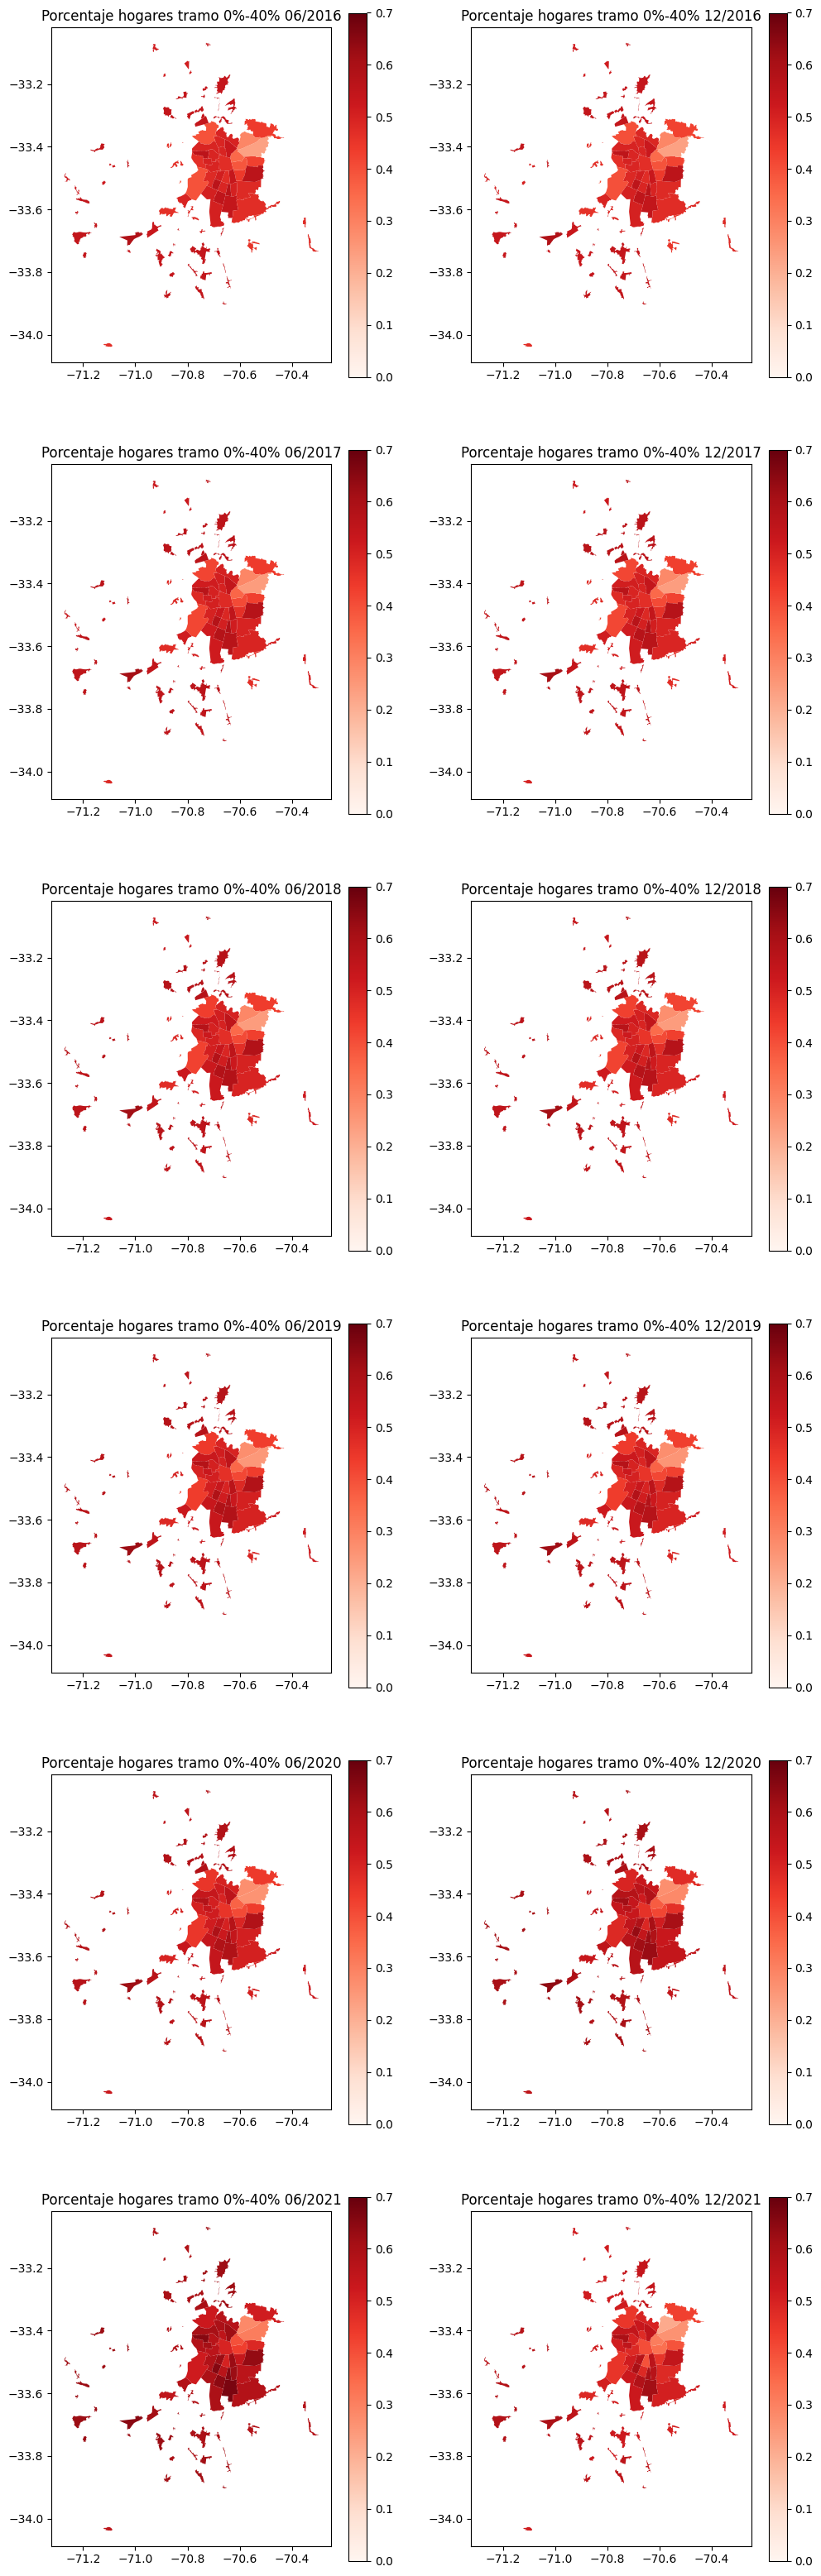

In [115]:
# graficamos porcentaje de hogares en tramo bajo
fig, axes = plt.subplots(6, 2)
fig.set_size_inches(12, 40)

i, j = 0, 0
for periodo in lista_periodos:
    plot_mapa(dict_mapas=dict_mapas, periodo=periodo, tramos="bajos", ax=axes[i][j])
    if j == 0:
        j += 1
    else:
        j = 0
        i += 1

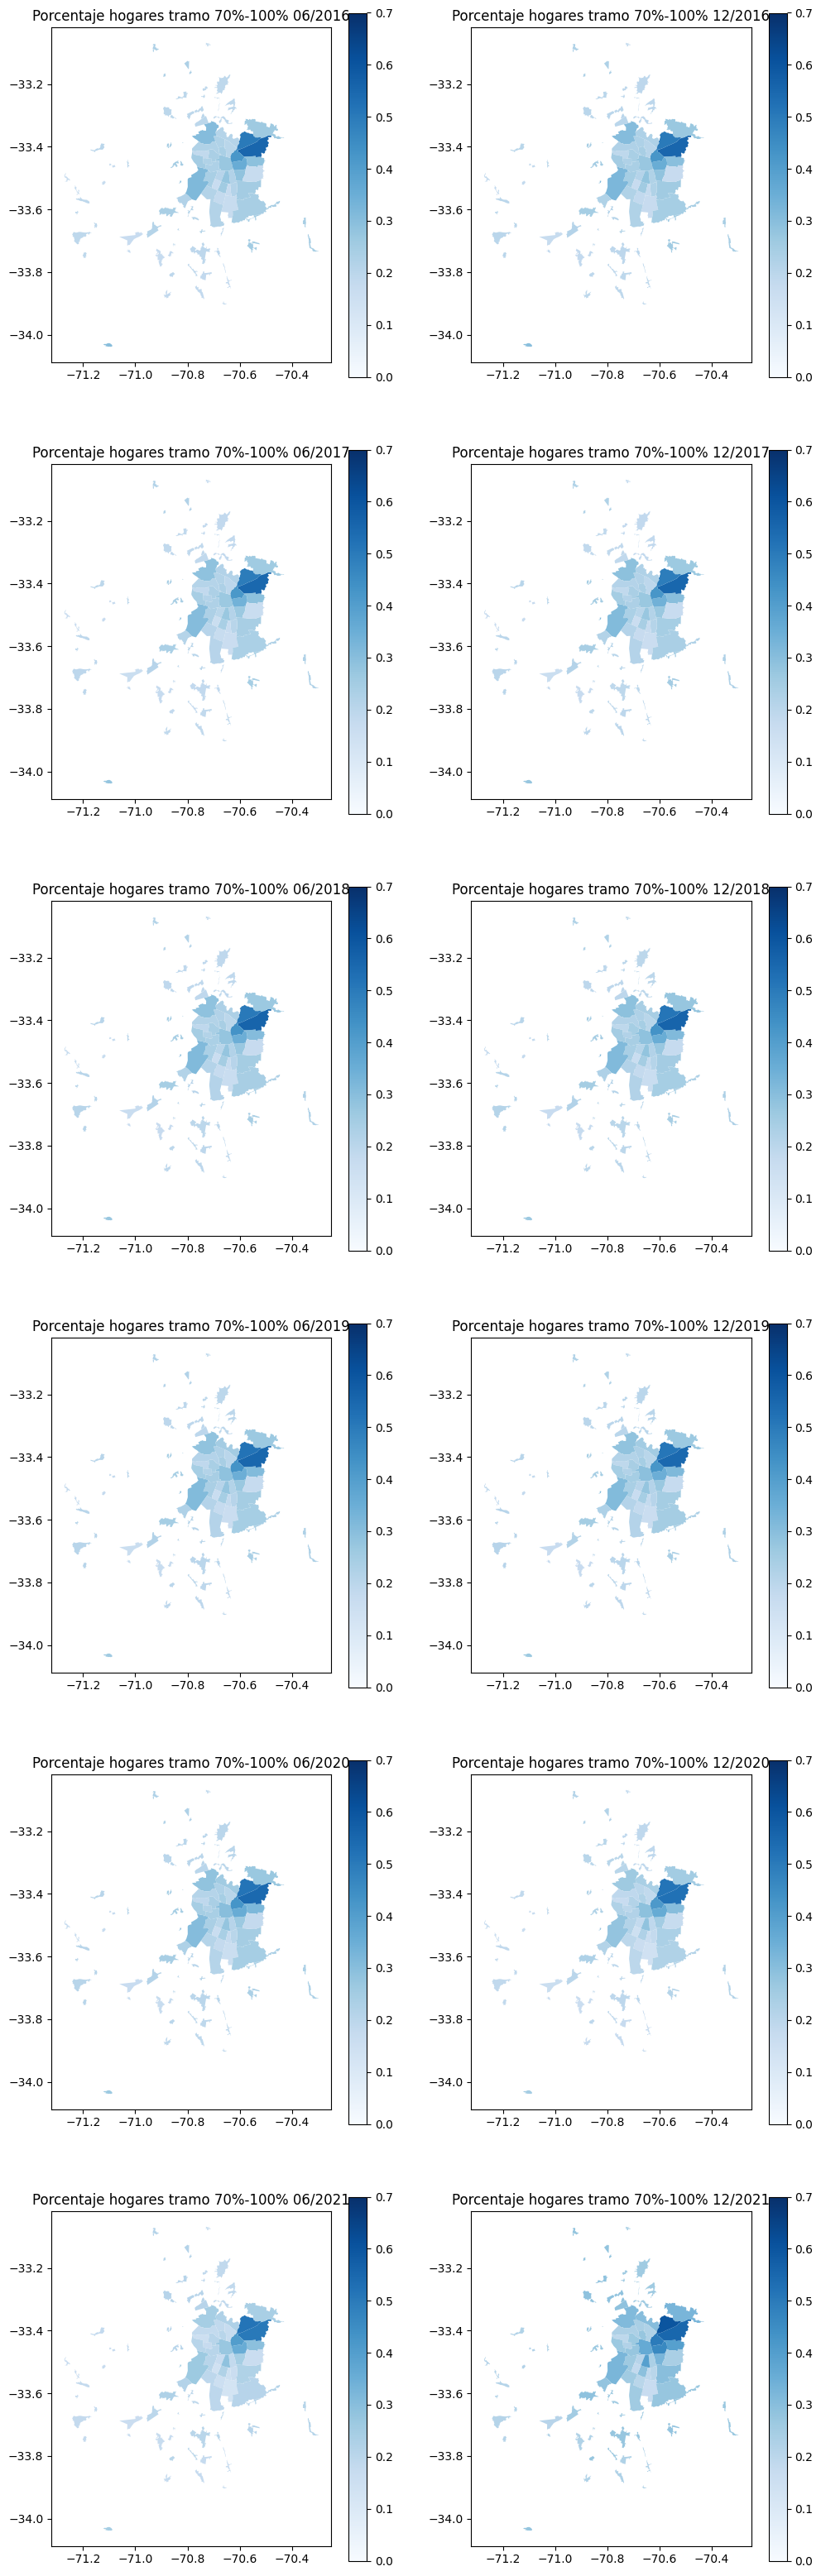

In [75]:
# graficamos porcentaje de hogares en tramo alto
fig, axes = plt.subplots(6, 2)
fig.set_size_inches(12, 40)

i, j = 0, 0
for periodo in lista_periodos:
    plot_mapa(dict_mapas=dict_mapas, periodo=periodo, tramos="altos", ax=axes[i][j])
    if j == 0:
        j += 1
    else:
        j = 0
        i += 1

In [76]:
# Nuevo dict de mapas que considera solo la provincia de santiago (de código 131)
dict_mapas_santiago = {}
for periodo, mapa in dict_mapas.items():
    mapa_santiago = mapa[mapa["codigo_provincia"] == 131]
    dict_mapas_santiago[periodo] = mapa_santiago

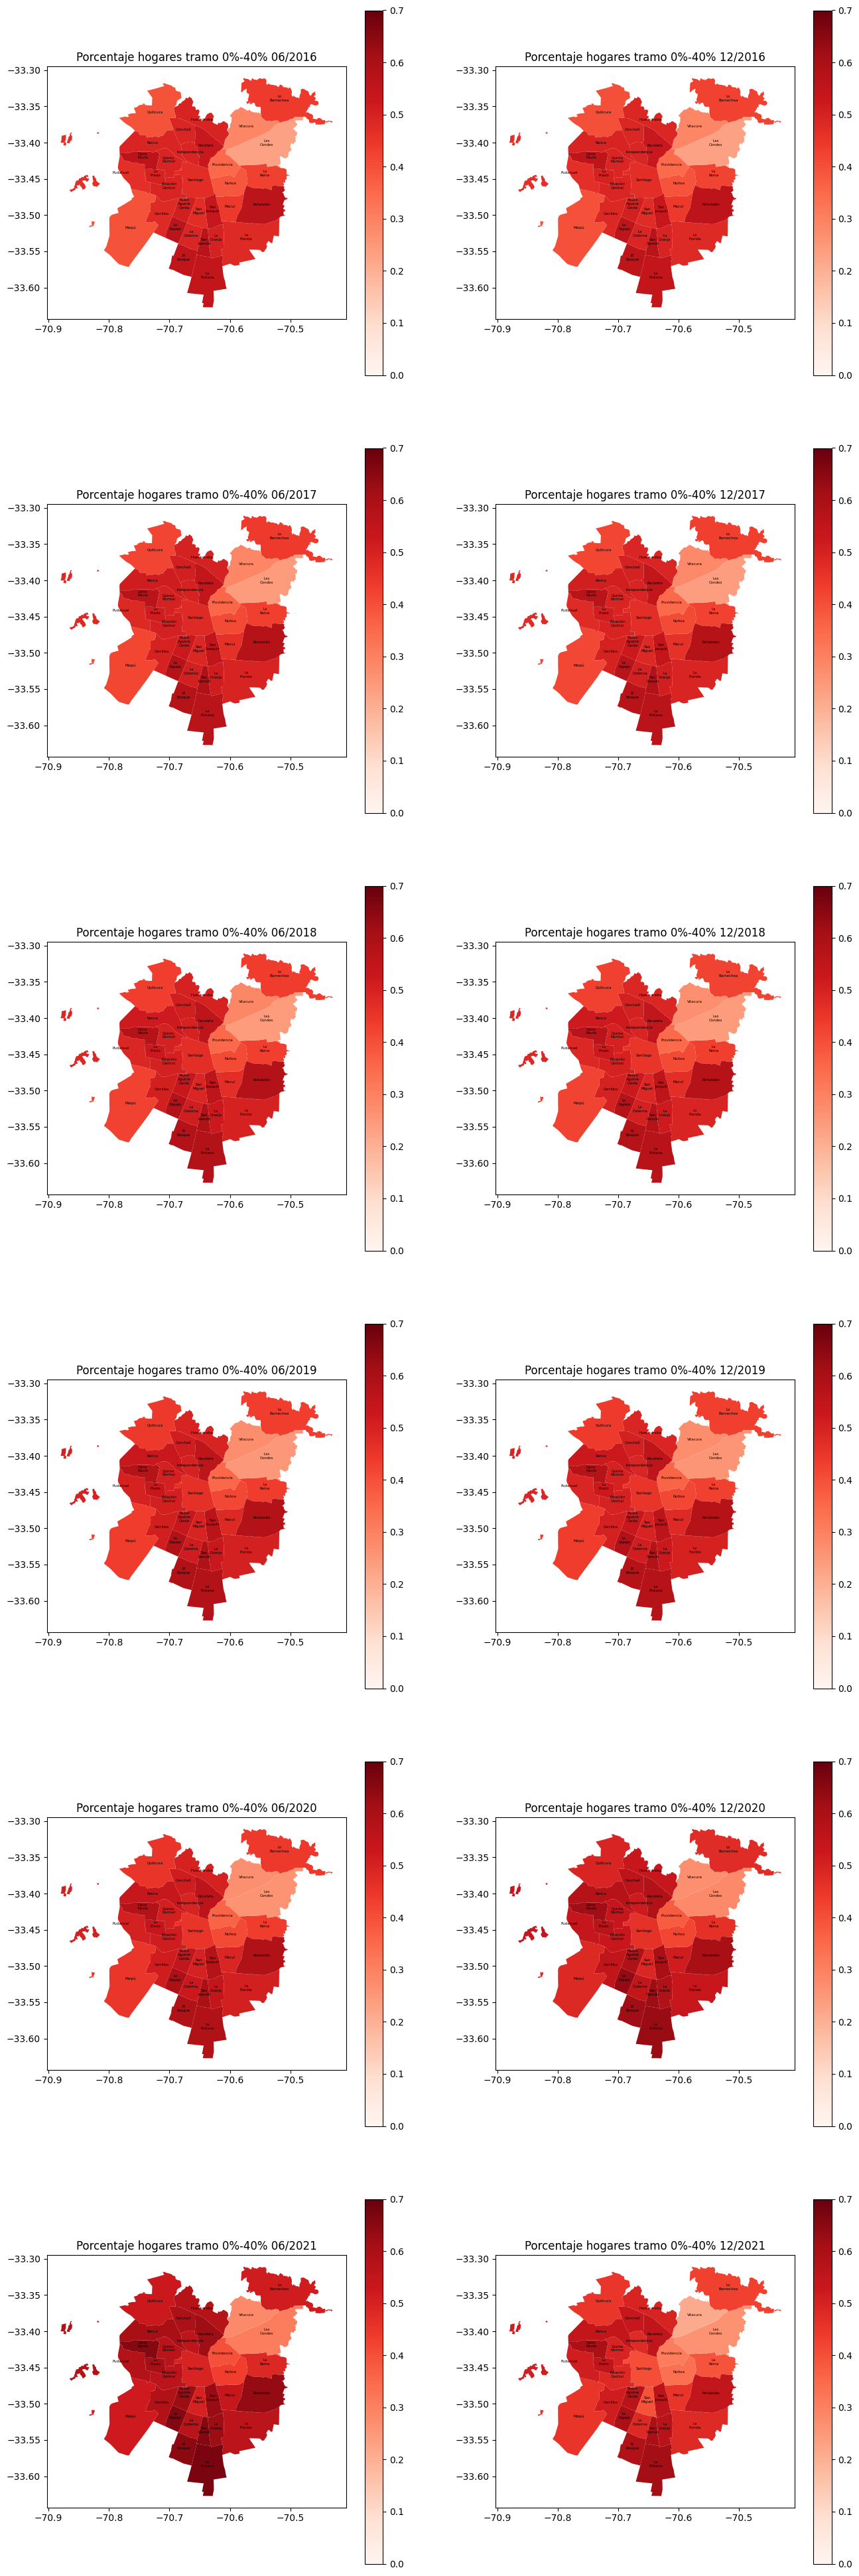

In [116]:
# Graficamos porcentaje de hogares en tramo bajo solo en provincia de santiago

fig, axes = plt.subplots(6, 2)
fig.set_size_inches(16, 50)

i, j = 0, 0
for periodo in lista_periodos:
    plot_mapa(dict_mapas=dict_mapas_santiago, periodo=periodo, tramos="bajos", ax=axes[i][j], nombres_flotantes=4)
    if j == 0:
        j += 1
    else:
        j = 0
        i += 1

In [ ]:
# Guardamos mapas de calor tramos bajos
for periodo in lista_periodos:
    fig, ax = plt.subplots()
    fig.set_size_inches(16, 16)
    plot_mapa(dict_mapas=dict_mapas_santiago, periodo=periodo, tramos="bajos", ax=ax, nombres_flotantes=9)
    path_guardar = os.path.join("..", "imgs", "CSE_tramos_bajos", "mapas_calor", f"{periodo}")
    fig.savefig(path_guardar, bbox_inches="tight")

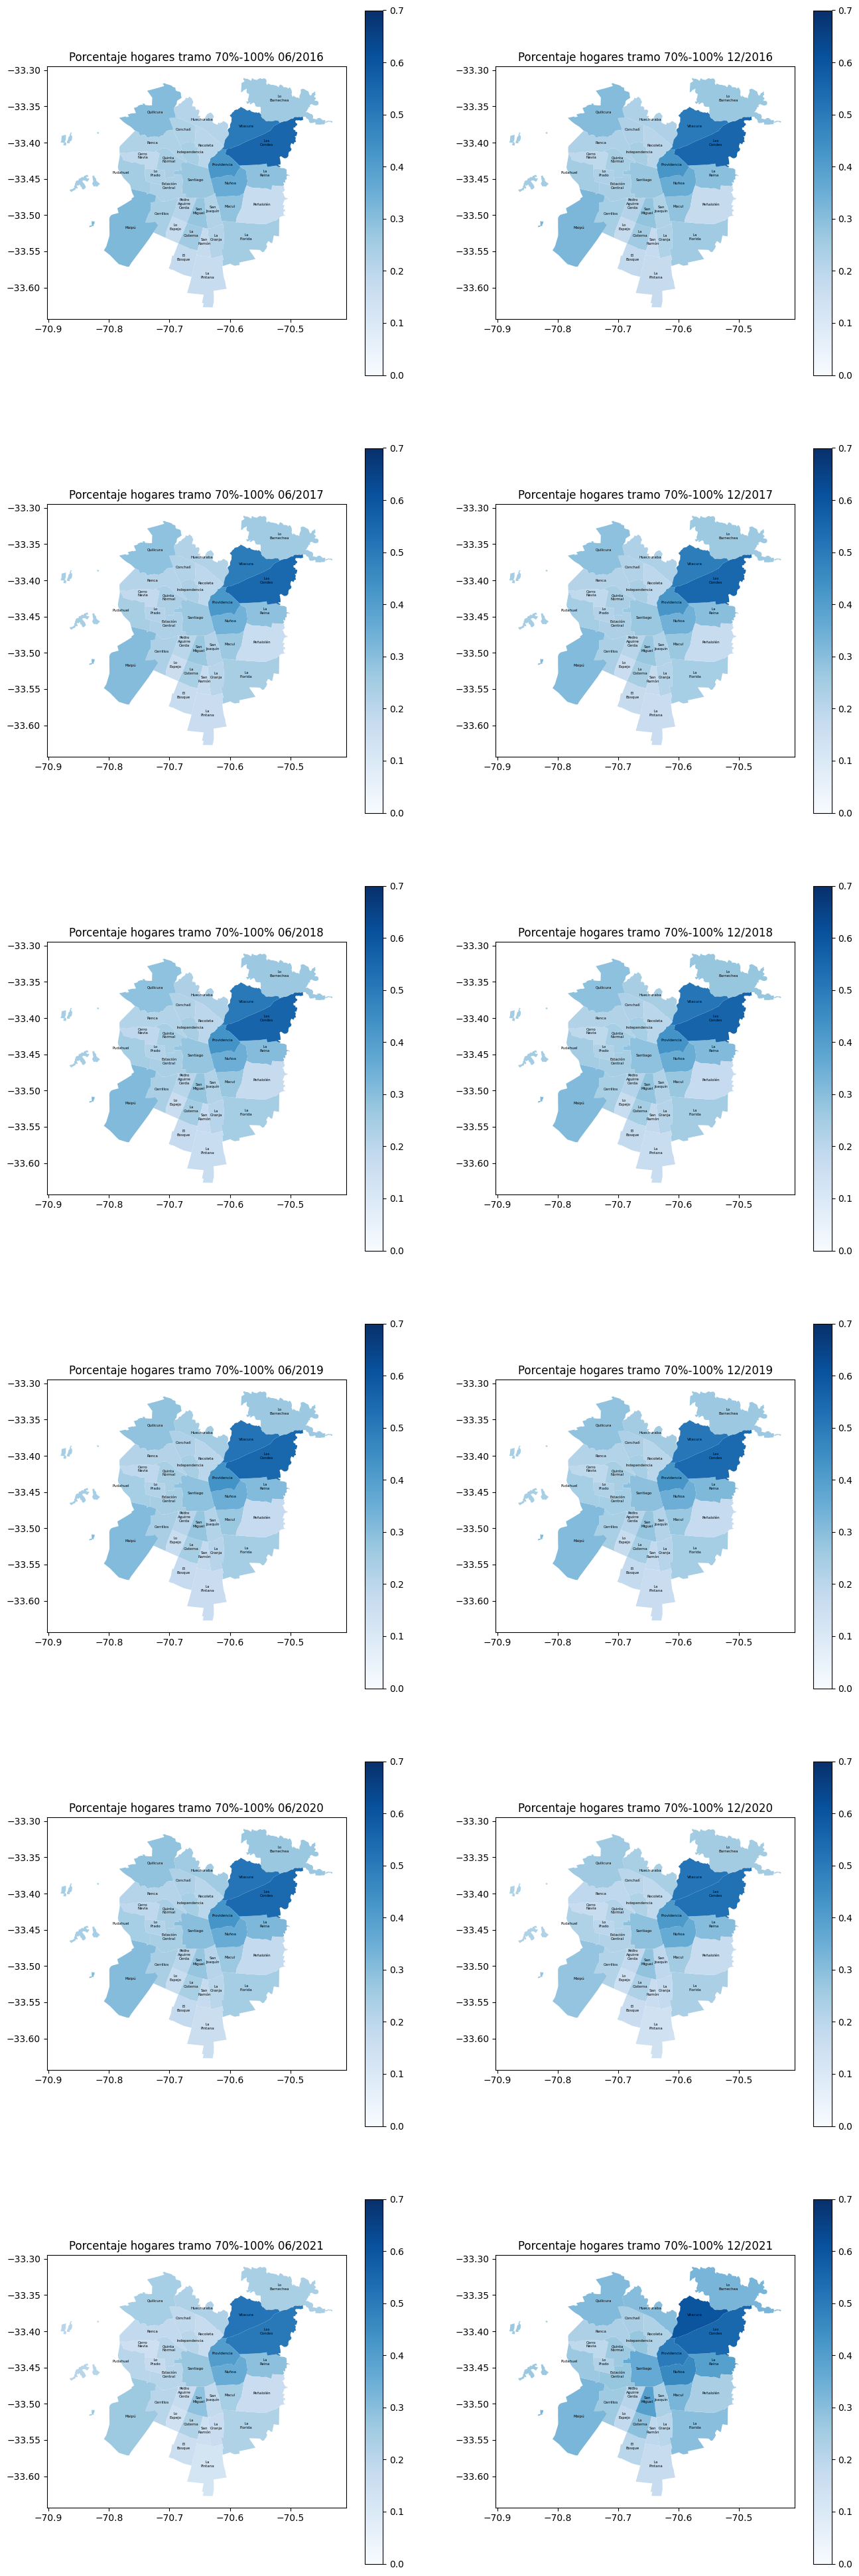

In [120]:
# Graficamos porcentaje de hogares en tramo alto solo en provincia de santiago

fig, axes = plt.subplots(6, 2)
fig.set_size_inches(16, 50)

i, j = 0, 0
for periodo in lista_periodos:
    plot_mapa(dict_mapas=dict_mapas_santiago, periodo=periodo, tramos="altos", ax=axes[i][j], nombres_flotantes=4)
    if j == 0:
        j += 1
    else:
        j = 0
        i += 1

In [ ]:
# Guardamos mapas de calor tramos altos
for periodo in lista_periodos:
    fig, ax = plt.subplots()
    fig.set_size_inches(16, 16)
    plot_mapa(dict_mapas=dict_mapas_santiago, periodo=periodo, tramos="altos", ax=ax, nombres_flotantes=9)
    path_guardar = os.path.join("..", "imgs", "CSE_tramos_altos", "mapas_calor", f"{periodo}")
    fig.savefig(path_guardar, bbox_inches = "tight")

## Regresiones lineales de tramos CSE

In [81]:
# lista con nombres de todas las comunas en la RM
lista_comunas = list(dict_mapas["201606"]["nombre comuna"])
# lista con periodos disponibles en la data
lista_periodos = list(dict_mapas.keys())
lista_periodos.sort()

In [82]:
# funcion que retorna un df con la info de porcentajes tramo bajo/alto de una comuna
# a lo largo del tiempo

def df_comuna(nombre_comuna, tramos):
    if tramos == "bajos":
        columna_clave = "prc tramo 0 - 40"
    elif tramos == "altos":
        columna_clave = "prc tramos altos"
    df = pd.DataFrame({"year": [], columna_clave: []})
    for periodo in lista_periodos:
        ano = float(periodo[0:4]) + float(periodo[4:]) / 12
        com = dict_mapas[periodo][dict_mapas[periodo]["nombre comuna"] == nombre_comuna]
        df_provisorio = pd.DataFrame({"year": [ano], columna_clave: [float(com[columna_clave])]})
        df = pd.concat((df, df_provisorio), axis="index", ignore_index=True)
    return df

In [83]:
# funcion que retorna el ajuste lineal de la data de los porcentajes tramo bajo/alto de
# una comuna a lo largo del tiempo

def linear_comuna(nombre_comuna, tramos):
    if tramos == "bajos":
        columna_clave = "prc tramo 0 - 40"
    elif tramos == "altos":
        columna_clave = "prc tramos altos"
    df_com = df_comuna(nombre_comuna, tramos)
    y = df_com[columna_clave]
    x = df_com["year"]
    x = sm.add_constant(x)
    return sm.OLS(y, x).fit()

In [84]:
# funcion que hace grafica la data de los porcentajes de tramos bajo/alto de una
# comuna a lo largo del tiempo, junto con la recta del ajuste lineal

def plot_comuna(nombre_comuna, tramos, ax):
    if tramos == "bajos":
        columna_clave = "prc tramo 0 - 40"
        eje_y = "Porcentaje hogares tramo 0%-40%"
    elif tramos == "altos":
        columna_clave = "prc tramos altos"
        eje_y = "Porcentaje hogares tramo 70%-100%"
    df_com = df_comuna(nombre_comuna, tramos)
    linear_com = linear_comuna(nombre_comuna, tramos)
    beta_0, beta_1 = linear_com.params
    x_ticks = np.arange(start=2015, stop=2025, step=0.5)
    y_ticks = beta_0 + beta_1 * x_ticks
    ax.set_title(nombre_comuna)
    sns.scatterplot(
        df_com,
        x = "year",
        y = columna_clave,
        label = "Datos Reales",
        color = "black",
        ax=ax
    )
    sns.lineplot(
        x = x_ticks,
        y = y_ticks, 
        label = "Ajuste Lineal",
        color = "red",
        ax=ax
    )
    ax.set_ylabel(eje_y)
    ax.set_xlabel("Año")
    ax.legend()

/var/folders/ym/46w6_4ls407_ndr7k1j2qkgw0000gn/T/ipykernel_3750/3458453290.py:13: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  df_provisorio = pd.DataFrame({"year": [ano], columna_clave: [float(com[columna_clave])]})
/var/folders/ym/46w6_4ls407_ndr7k1j2qkgw0000gn/T/ipykernel_3750/3458453290.py:13: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  df_provisorio = pd.DataFrame({"year": [ano], columna_clave: [float(com[columna_clave])]})
/var/folders/ym/46w6_4ls407_ndr7k1j2qkgw0000gn/T/ipykernel_3750/3458453290.py:13: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  df_provisorio = pd.DataFrame({"year": [ano], columna_clave: [float(com[columna_clave])]})
/var/folders/ym/46w6_4ls407_ndr7k1j2qkgw0000gn/T/

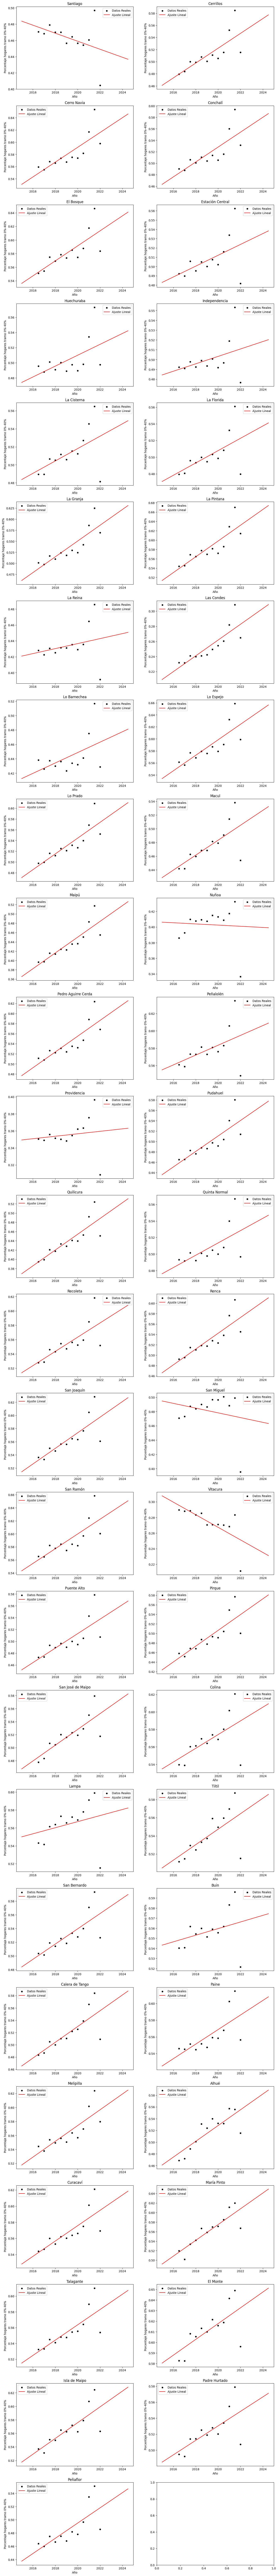

In [85]:
# Graficamos para el tramo bajo

fig, axes = plt.subplots(26, 2)
fig.set_size_inches(16, 160)

i, j = 0, 0
for comuna in lista_comunas:
    plot_comuna(comuna, "bajos", axes[i][j])
    if j == 0:
        j += 1
    else:
        j = 0
        i += 1

In [ ]:
# Crear figura y ejes, y guardar imagen
fig, ax = plt.subplots()

for comuna in lista_comunas:
    plot_comuna(comuna, "bajos", ax=ax)
    path_guardar = os.path.join("..", "imgs", "CSE_tramos_bajos", "lineales", f"{comuna}")
    fig.savefig(path_guardar)
    ax.cla()

/var/folders/ym/46w6_4ls407_ndr7k1j2qkgw0000gn/T/ipykernel_3750/3458453290.py:13: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  df_provisorio = pd.DataFrame({"year": [ano], columna_clave: [float(com[columna_clave])]})
/var/folders/ym/46w6_4ls407_ndr7k1j2qkgw0000gn/T/ipykernel_3750/3458453290.py:13: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  df_provisorio = pd.DataFrame({"year": [ano], columna_clave: [float(com[columna_clave])]})
/var/folders/ym/46w6_4ls407_ndr7k1j2qkgw0000gn/T/ipykernel_3750/3458453290.py:13: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  df_provisorio = pd.DataFrame({"year": [ano], columna_clave: [float(com[columna_clave])]})
/var/folders/ym/46w6_4ls407_ndr7k1j2qkgw0000gn/T/

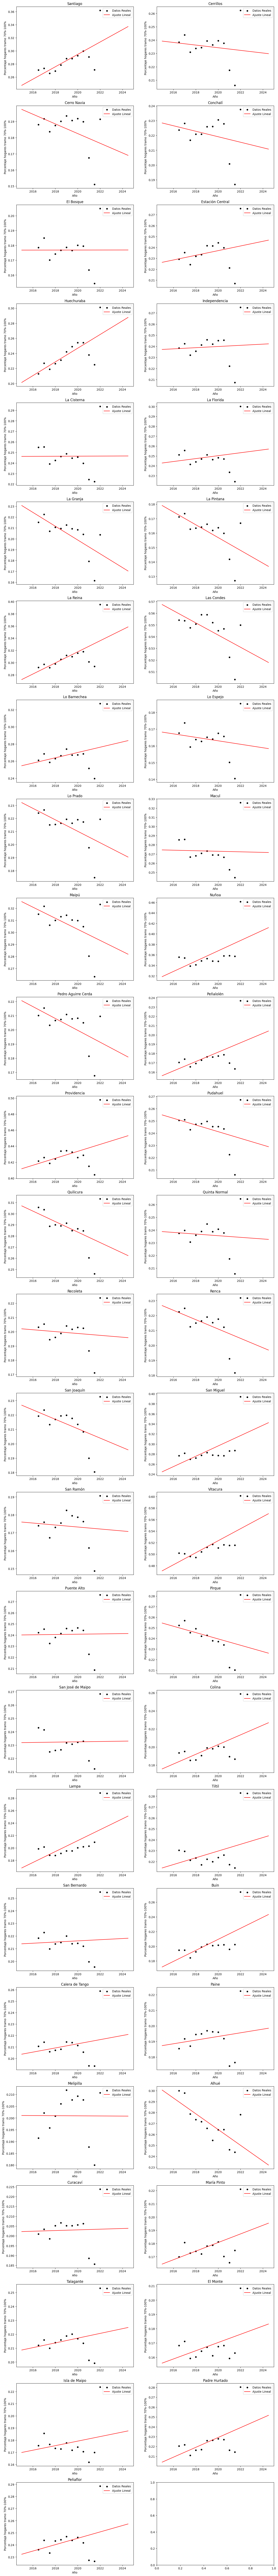

In [87]:
# Graficamos para el tramo alto

fig, axes = plt.subplots(26, 2)
fig.set_size_inches(16, 160)

i, j = 0, 0
for comuna in lista_comunas:
    plot_comuna(comuna, "altos", axes[i][j])
    if j == 0:
        j += 1
    else:
        j = 0
        i += 1

In [ ]:
# Guardar imágenes de regresiones linales tramos bajos
fig, ax = plt.subplots()

for comuna in lista_comunas:
    plot_comuna(comuna, "altos", ax=ax)
    path_guardar = os.path.join("..", "imgs", "CSE_tramos_altos", "lineales", f"{comuna}")
    fig.savefig(path_guardar)
    ax.cla()

/var/folders/ym/46w6_4ls407_ndr7k1j2qkgw0000gn/T/ipykernel_3750/3458453290.py:13: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  df_provisorio = pd.DataFrame({"year": [ano], columna_clave: [float(com[columna_clave])]})
/var/folders/ym/46w6_4ls407_ndr7k1j2qkgw0000gn/T/ipykernel_3750/3458453290.py:13: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  df_provisorio = pd.DataFrame({"year": [ano], columna_clave: [float(com[columna_clave])]})
/var/folders/ym/46w6_4ls407_ndr7k1j2qkgw0000gn/T/ipykernel_3750/3458453290.py:13: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  df_provisorio = pd.DataFrame({"year": [ano], columna_clave: [float(com[columna_clave])]})
/var/folders/ym/46w6_4ls407_ndr7k1j2qkgw0000gn/T/

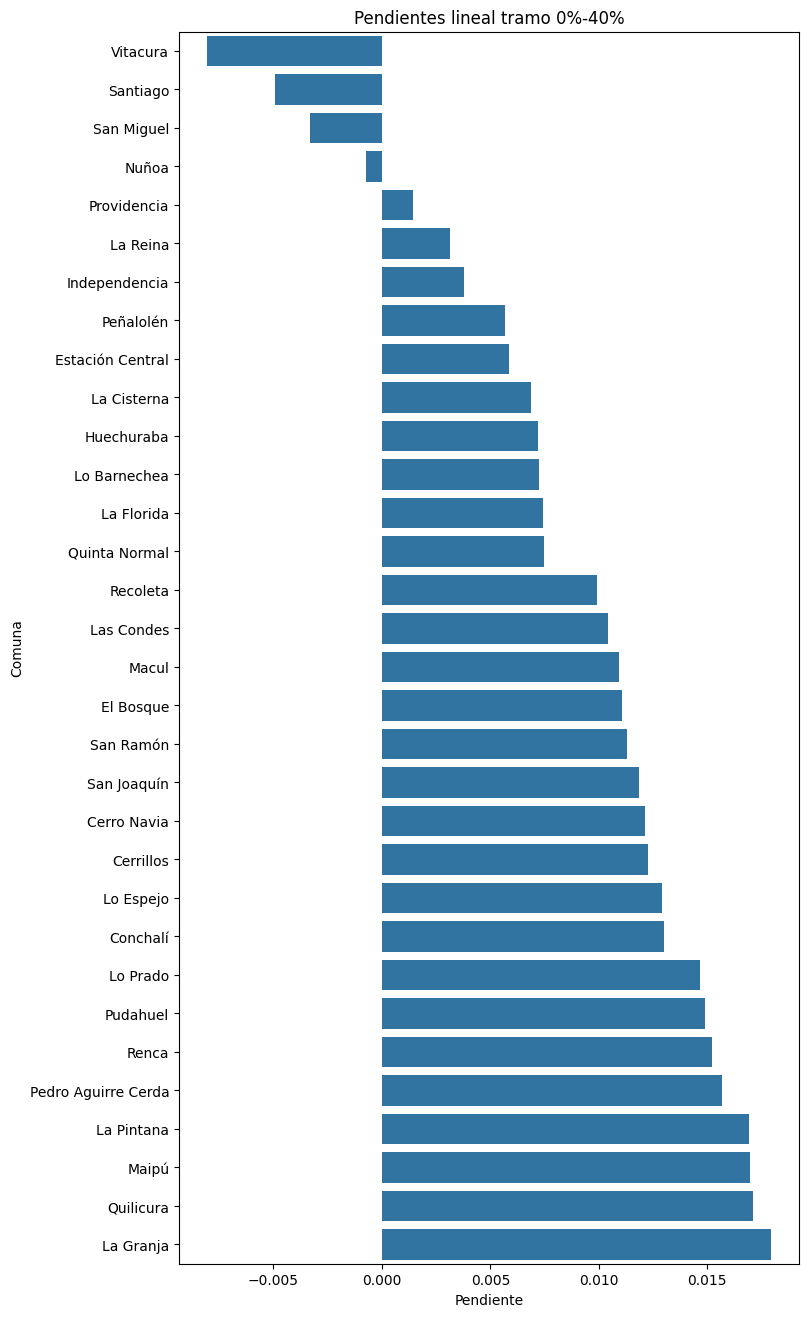

In [89]:
# Lista comunas de Santiago
lista_comunas_santiago = list(dict_mapas_santiago["201606"]["nombre comuna"])

# Comparar parámetros b_1 de cada comuna tramos bajos (solo provincia de Santiago)
df_betas = pd.DataFrame({"Comuna": [], "Pendiente": []})
for comuna in lista_comunas_santiago:
    lin_com = linear_comuna(comuna, "bajos")
    beta_1 = lin_com.params[1]
    df_auxliar = pd.DataFrame({"Comuna": [comuna], "Pendiente": [beta_1]})
    df_betas = pd.concat([df_betas, df_auxliar], axis="index", ignore_index=True)

df_betas.sort_values("Pendiente", ignore_index=True, inplace=True)

# Gráfico
fig, ax = plt.subplots()
fig.set_size_inches(8, 16)
ax.set_title("Pendientes lineal tramo 0%-40%")
sns.barplot(df_betas, orient="h", y="Comuna", x="Pendiente", ax=ax)

# Guardar gráfico
path_guardar = os.path.join("..", "imgs", "CSE_tramos_bajos", "comparacion_betas")
fig.savefig(path_guardar, bbox_inches = "tight")

/var/folders/ym/46w6_4ls407_ndr7k1j2qkgw0000gn/T/ipykernel_3750/3458453290.py:13: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  df_provisorio = pd.DataFrame({"year": [ano], columna_clave: [float(com[columna_clave])]})
/var/folders/ym/46w6_4ls407_ndr7k1j2qkgw0000gn/T/ipykernel_3750/3458453290.py:13: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  df_provisorio = pd.DataFrame({"year": [ano], columna_clave: [float(com[columna_clave])]})
/var/folders/ym/46w6_4ls407_ndr7k1j2qkgw0000gn/T/ipykernel_3750/3458453290.py:13: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  df_provisorio = pd.DataFrame({"year": [ano], columna_clave: [float(com[columna_clave])]})
/var/folders/ym/46w6_4ls407_ndr7k1j2qkgw0000gn/T/

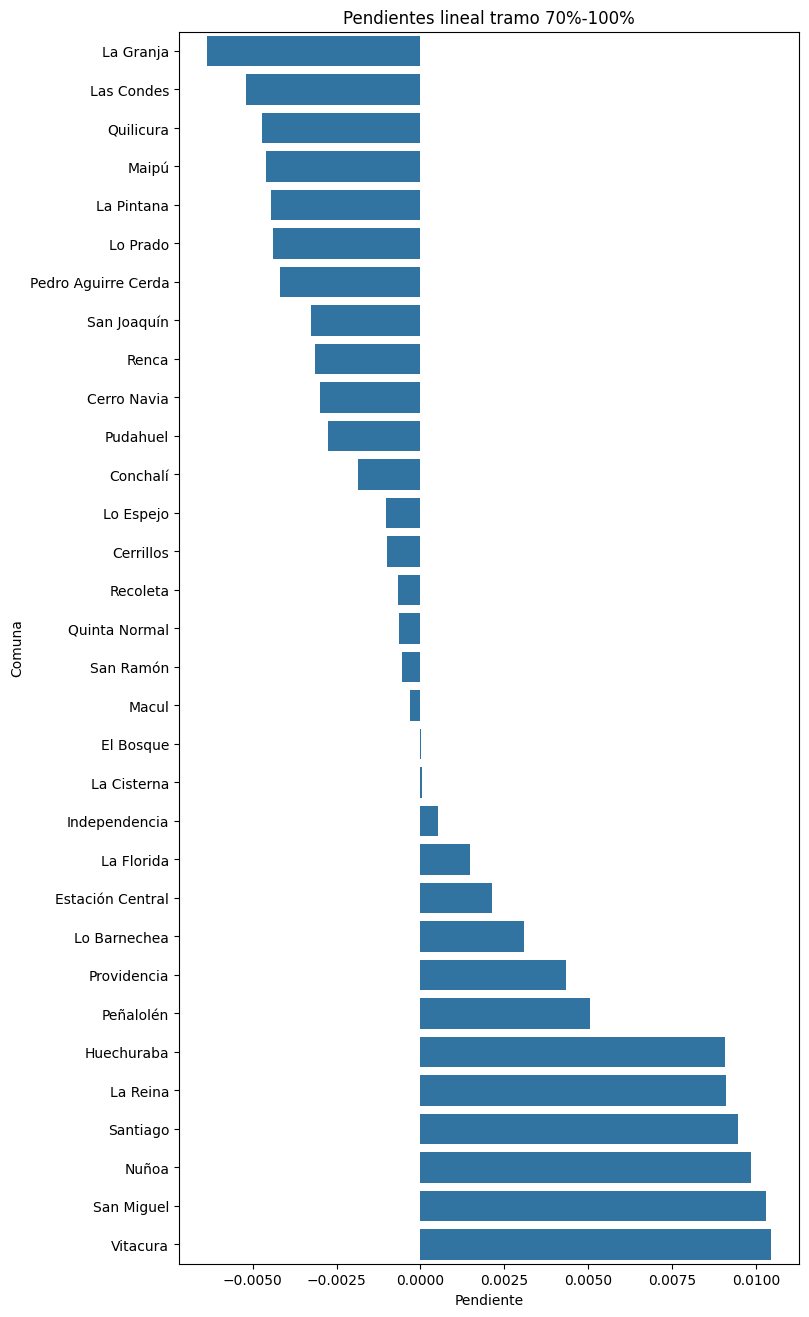

In [90]:
# Comparar parámetros b_1 de cada comuna tramos altos (solo comuna de Santiago)
df_betas = pd.DataFrame({"Comuna": [], "Pendiente": []})
for comuna in lista_comunas_santiago:
    lin_com = linear_comuna(comuna, "altos")
    beta_1 = lin_com.params[1]
    df_auxliar = pd.DataFrame({"Comuna": [comuna], "Pendiente": [beta_1]})
    df_betas = pd.concat([df_betas, df_auxliar], axis="index", ignore_index=True)

df_betas.sort_values("Pendiente", ignore_index=True, inplace=True)

# Gráfico
fig, ax = plt.subplots()
fig.set_size_inches(8, 16)
ax.set_title("Pendientes lineal tramo 70%-100%")
sns.barplot(df_betas, orient="h", y="Comuna", x="Pendiente", ax=ax)

# Guardar gráfico
path_guardar = os.path.join("..", "imgs", "CSE_tramos_altos", "comparacion_betas")
fig.savefig(path_guardar, bbox_inches = "tight")